## Shallow Neural Network

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12.6, 7)

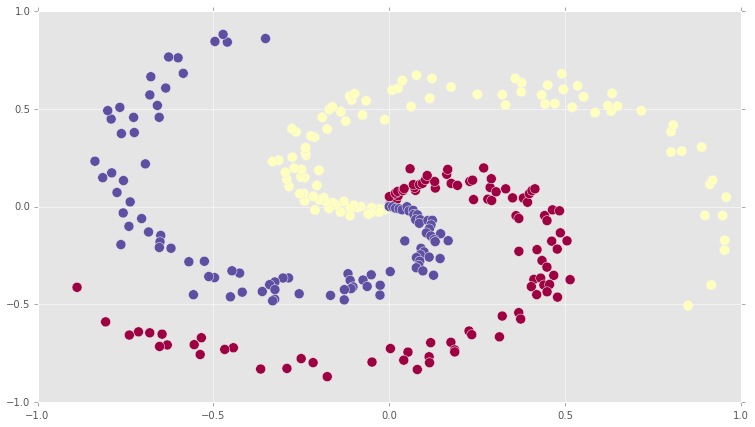

In [40]:
# generate some synthetic data 
# modified version given in http://cs.stanford.edu/people/karpathy/cs231nfiles/minimal_net.html
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X_data = np.zeros((N*K,D))
y_data = np.zeros(N*K, dtype='uint8')
for j in xrange(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N)
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X_data[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y_data[ix] = j
fig = plt.figure()
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

epoch: 0  cost: 1.661504
epoch: 100  cost: 0.287699
epoch: 200  cost: 0.216687
epoch: 300  cost: 0.179639
epoch: 400  cost: 0.155912
epoch: 500  cost: 0.139211
epoch: 600  cost: 0.126697
epoch: 700  cost: 0.116851
epoch: 800  cost: 0.108874
epoch: 900  cost: 0.102212
training set accuracy: 0.976667


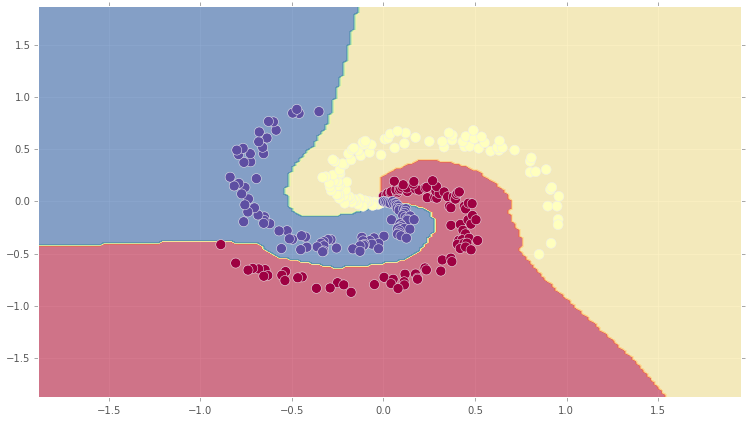

In [45]:
#creating placeholders for X and y
X = tf.placeholder("float", shape=[None, 2])
y = tf.placeholder("float", shape=[None, 3])

one_hot_vector = np.zeros((N*K, 3))
one_hot_vector[range(N*K), y_data] = 1

epochs =  1000
hidden_size = 50
print_loss_in_steps = 100
learning_rate = 0.001

# creating model parameters
W1 = tf.Variable(tf.random_normal([2, hidden_size]))
b1 = tf.Variable(tf.zeros([hidden_size]))

W2 = tf.Variable(tf.random_normal([hidden_size, 3]))
b2 = tf.Variable(tf.zeros([3]))

hidden = tf.nn.relu(tf.matmul(X, W1) + b1)
output = tf.nn.softmax(tf.matmul(hidden, W2) +  b2)
loss = -tf.reduce_sum(y*tf.log(output))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as session:
    session.run(tf.initialize_all_variables())
    for i in range(epochs):
        optimizer.run(feed_dict={X:X_data, y:one_hot_vector})
        cost = session.run(loss, feed_dict={X:X_data, y:one_hot_vector})/(N*K)
        if i % print_loss_in_steps == 0:
            print "epoch: %d  cost: %f" %(i, cost)
    
    hidden = tf.nn.relu(tf.matmul(X, W1) + b1)
    output = tf.matmul(hidden, W2) +  b2
    correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(one_hot_vector,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "training set accuracy: %f" %(accuracy.eval({X: X_data, y: one_hot_vector}))
    
    
    h = 0.02
    x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], session.run(W1)) + 
                                    session.run(b1)), session.run(W2)) + session.run(b2)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())